## Rejection Sampling

### Introduction
Rejection sampling is a method of drawing points from a target distribution by sampling from an easier distribution and correcting the sampling probability through the rejection of some candidates. Suppose we are interested in drawing points from a distribution $f$ who is easy to evaluate but whose integral is computationally expensive to compute. Let $g$ denote another density which we know how to sample from, and let $e$ denote an envelope function given by $e(x) = \frac{g(x)}{\alpha}$ for some $\alpha \leq 1$ such that $e$ dominates $f$ across its domain.

### A. Rejection Sampling Setup
1. Define $g$ as a function that is easy to sample from and that possesses the same domain as $f$
2. Select a costant $\alpha$ such that $e(x) = g(x)/\alpha$ dominates $f$ across its domain

Note: Higher $\alpha$ values will increase the efficiency of the algorithm, since, as $\alpha$ increases, $f(x)/e(x)$ increases for all $x$, and less candidate points will be rejected as a result. However, $\alpha$ should still be low enough that $e$ dominates $f$ entirely.

### B. The Rejection Sampling Algorithm
The algorithm works as follows:
1. Sample $Y$~$g$
2. Sample $U$~Unif$(0,1)$
4. If $U \leq f(Y)/e(Y)$, keep $Y$ for $x$
5. Else reject $Y$
6. repeat $n$ times

### C. Rejection Sampling With an Example $f$
Let

$f(x) = e^{-\frac{|x^3|}{3}}$

In [64]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.stats import norm

%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

<IPython.core.display.Javascript object>


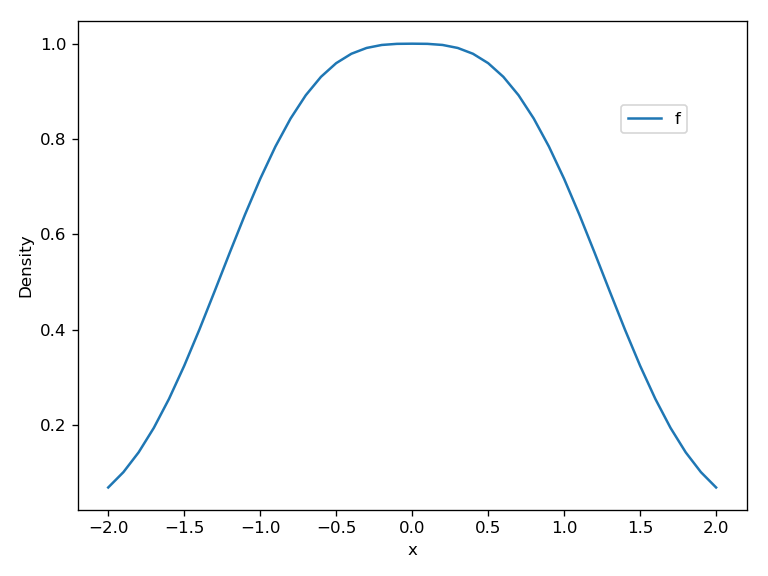

In [65]:
f = lambda x: np.exp(-1/3*np.abs(x**3))

axis = np.linspace(-2,2,41)

plt.figure()
plt.plot(axis, f(axis))
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(['f'],loc='center left', bbox_to_anchor=(0.8, 0.8))
plt.show()

We can use the standard normal distribution as our $g$,

<IPython.core.display.Javascript object>


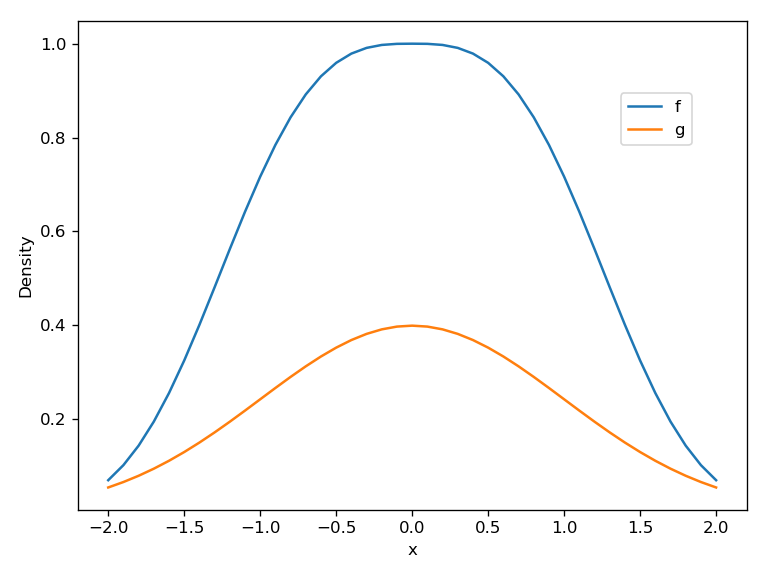

In [66]:
g = lambda x: norm.pdf(x)

plt.figure()
plt.plot(axis, f(axis))
plt.plot(axis, g(axis))
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(['f', 'g'],loc='center left', bbox_to_anchor=(0.8, 0.8))
plt.show()

Although the standard normal distribution is easy to sample from, it does not dominate $f$ as we can see in the figure above. Thus, we must choose an $\alpha$ such that $e$ dominates $f$. Select $\alpha = 0.3$ as an example,

<IPython.core.display.Javascript object>


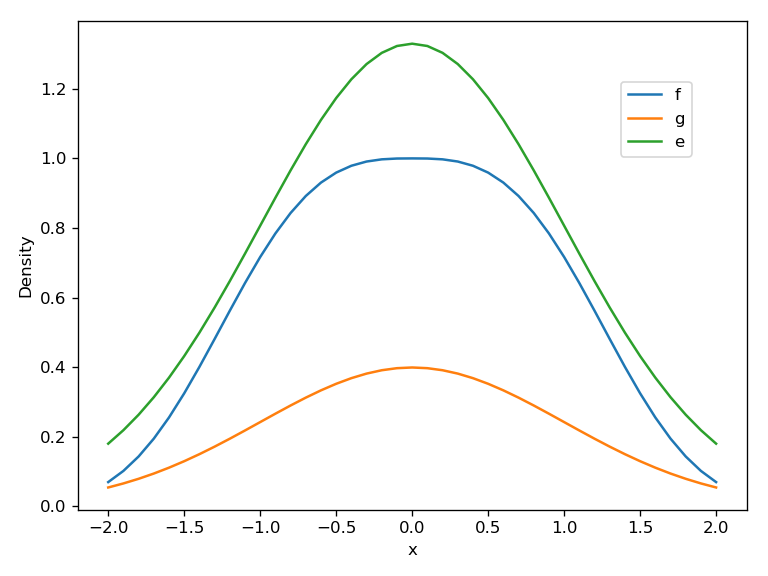

In [67]:
alpha = 0.3
e = lambda x: g(x)/alpha

plt.figure()
plt.plot(axis, f(axis))
plt.plot(axis, g(axis))
plt.plot(axis, e(axis))
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(['f', 'g', 'e'],loc='center left', bbox_to_anchor=(0.8, 0.8))
plt.show()

So,

$g(x) = N(0,1)$

and,

$e(x) = g(x)/0.3$

In [68]:
def rs(n):
    y = np.random.normal(size=n)
    u = np.random.uniform(size=n)
    x = y[u < f(y)/e(y)]
    ac_ratio = len(x)/n
    return [x, ac_ratio]

Let's generate a sample of size 100,000 using our algorithm,

In [69]:
listvals = rs(10**5)

<IPython.core.display.Javascript object>


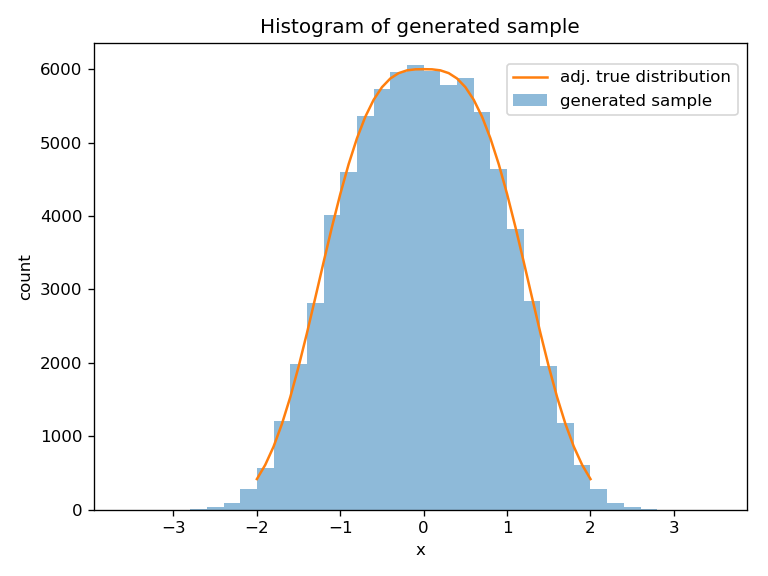

Text(0,0.5,'count')

In [70]:
plt.figure()
bins = np.arange(-3, 3, 0.2)
plt.hist(listvals[0], bins=bins, alpha=0.5)
plt.plot(axis, 6000*f(axis))
plt.xlim([min(listvals[0])-1, max(listvals[0])+1])
plt.legend(['adj. true distribution','generated sample'],loc='center left', bbox_to_anchor=(0.62, 0.9))
plt.title('Histogram of generated sample')
plt.xlabel('x')
plt.ylabel('count')

As you can see from the figure above, the distribution of our sample closely mirrors that of $f$, despite the fact that we never sampled from $f$; that's the power of rejection sampling.

The theoretical acceptance ratio of the envelope function is given by

$\frac{\int_{-\infty}^{\infty} f(x) \; dx}{\int_{-\infty}^{\infty} e(x) \; dx}$

In [71]:
integrate.quad(f, -1 * np.inf, np.inf)[0]/integrate.quad(e, -1 * np.inf, np.inf)[0]

0.7727395901124424

The experimental envelope ratio attained from this simulation is

In [72]:
listvals[1]

0.77226